In [7]:
import pandas as pd
import os

In [13]:
runs_path = 'history/runs/'

# get the latest of each unique models with ep in folder name
latest_runs = {}

for model_folder in os.listdir(runs_path):
    if 'ep' in model_folder:
        model_name = model_folder.split('_ep')[0]
        if model_name not in latest_runs or model_folder > latest_runs[model_name]:
            latest_runs[model_name] = model_folder

# print the latest runs
for model_name, run_folder in latest_runs.items():
    print(f"Latest run for {model_name}: {run_folder}")

# Now, let's read the metrics.csv file from each of these latest runs and print the row that has the highest val_auc

for model_name, run_folder in latest_runs.items():
    metrics_path = os.path.join(runs_path, run_folder, 'metrics.csv')
    
    # Check if the file exists before trying to read it
    if os.path.exists(metrics_path):
        metrics_data = pd.read_csv(metrics_path)
        best_val_auc_row = metrics_data.loc[metrics_data['val_auc'].idxmax()]
        
        # printing
        print(f'-' * 50)
        print(f"Best val_auc for {model_name} - Run: {run_folder}")
        print(best_val_auc_row)
        
    else:
        print(f"No metrics.csv found for {model_name} - Run: {run_folder}")

Latest run for run_efficientnet_20241205_114438: run_efficientnet_20241205_114438_ep7
Latest run for run_resnet101_20241204_201138: run_resnet101_20241204_201138_ep14
Latest run for run_resnet50_20241208_231720: run_resnet50_20241208_231720_ep6
Latest run for run_vit_base_20241207_110738: run_vit_base_20241207_110738_ep2
Latest run for run_vit_base_20241207_113554: run_vit_base_20241207_113554_ep28
Latest run for run_vit_mediumd_20241209_002034: run_vit_mediumd_20241209_002034_ep26
Latest run for run_vit_mediumd_20241209_021310: run_vit_mediumd_20241209_021310_ep13
Latest run for run_vit_mediumd_20241209_030414: run_vit_mediumd_20241209_030414_ep7
Latest run for run_vit_mediumd_20241209_032928: run_vit_mediumd_20241209_032928_ep7
--------------------------------------------------
Best val_auc for run_efficientnet_20241205_114438 - Run: run_efficientnet_20241205_114438_ep7
epoch           7.000000
loss            1.204147
accuracy        0.823851
auc             0.713347
val_loss       

--------------------------------------------------
Model: run_vit_base_20241207_113554_ep28
    epoch      loss  accuracy      auc  val_loss  val_accuracy   val_auc  \
27     28  1.272528  0.856686  0.65798  1.447146      0.878816  0.574633   

    auc_diff  
27  0.083348  


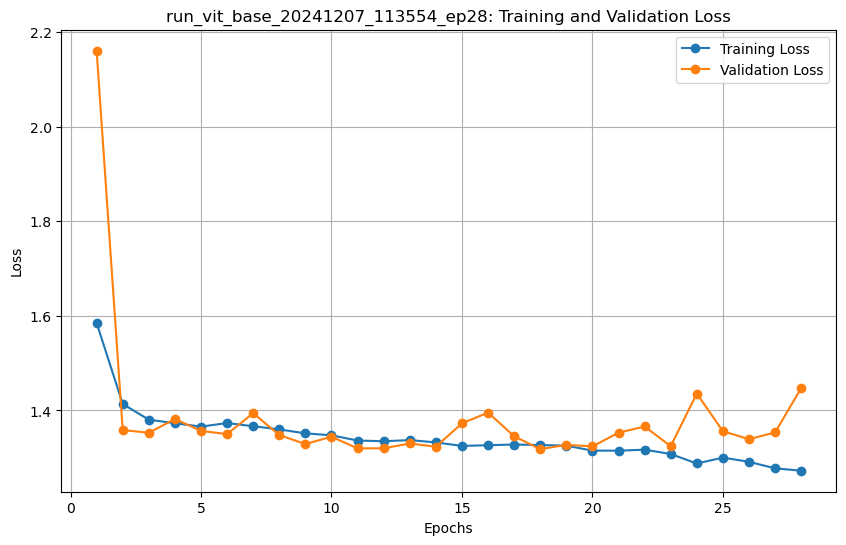

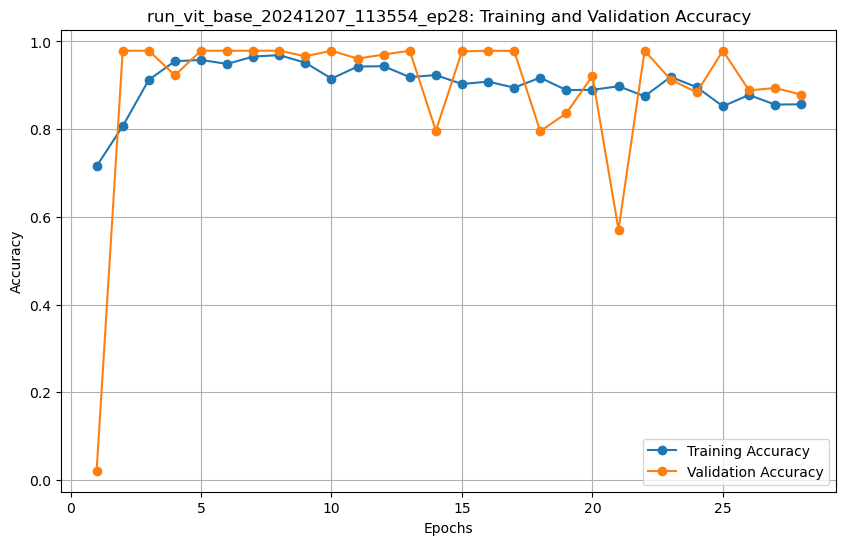

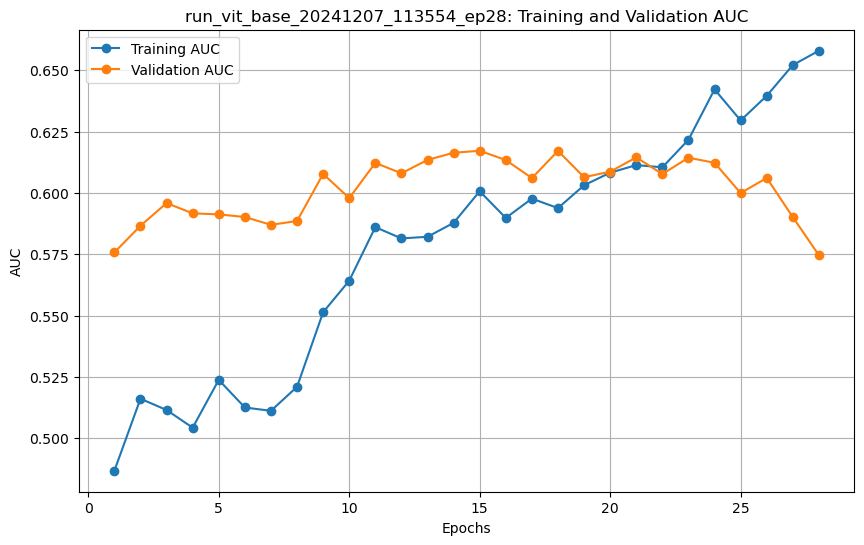

--------------------------------------------------
Model: run_efficientnet_20241205_114438_ep7
   epoch      loss  accuracy       auc  val_loss  val_accuracy   val_auc  \
6      7  1.204147  0.823851  0.713347  1.284357      0.791354  0.661808   

   auc_diff  
6   0.05154  


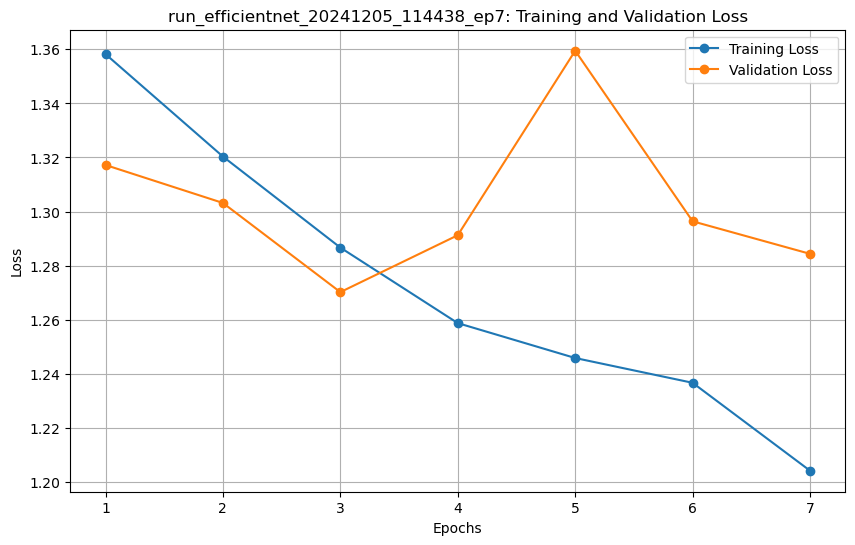

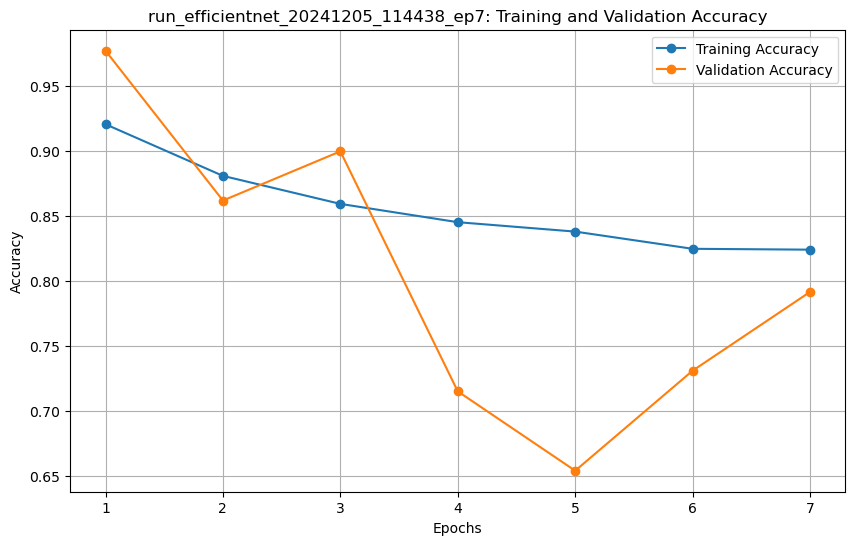

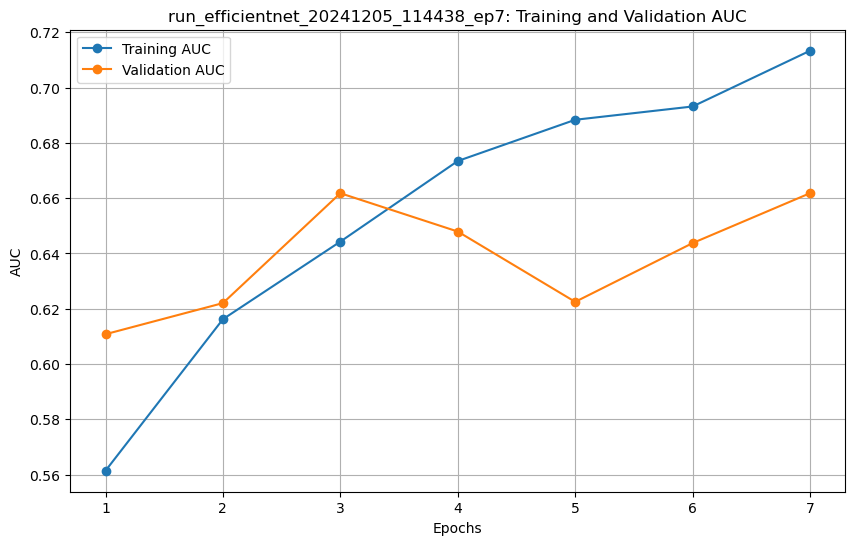

--------------------------------------------------
Model: run_resnet50_20241208_231720_ep6
   epoch      loss  accuracy       auc  val_loss  val_accuracy   val_auc  \
5      6  0.558451  0.918289  0.951403  2.080016      0.804789  0.676209   

   auc_diff  
5  0.275194  


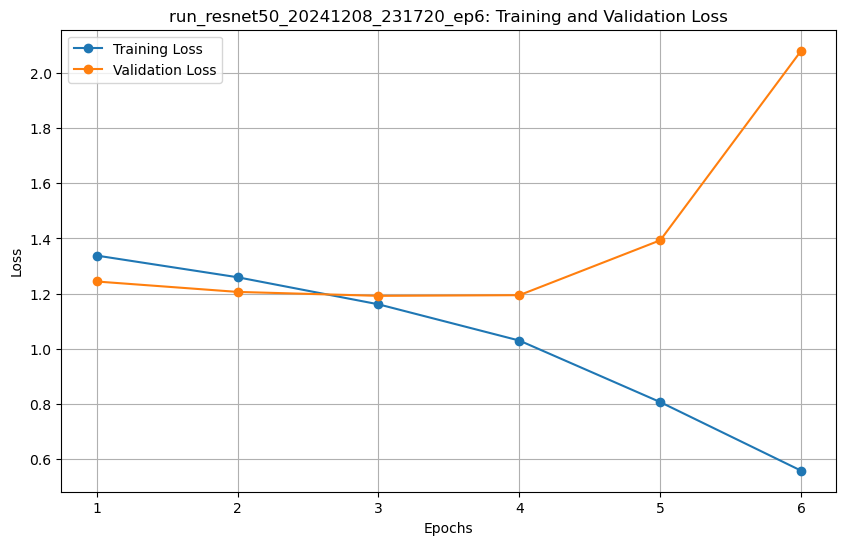

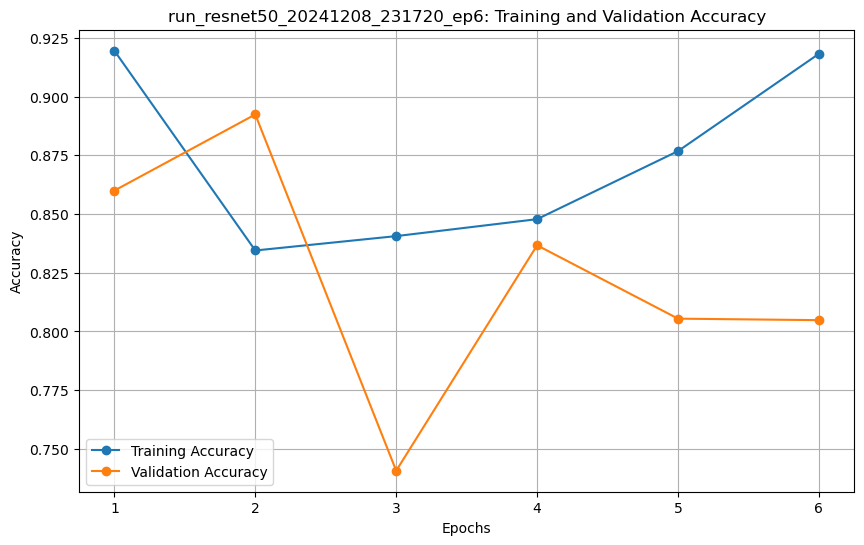

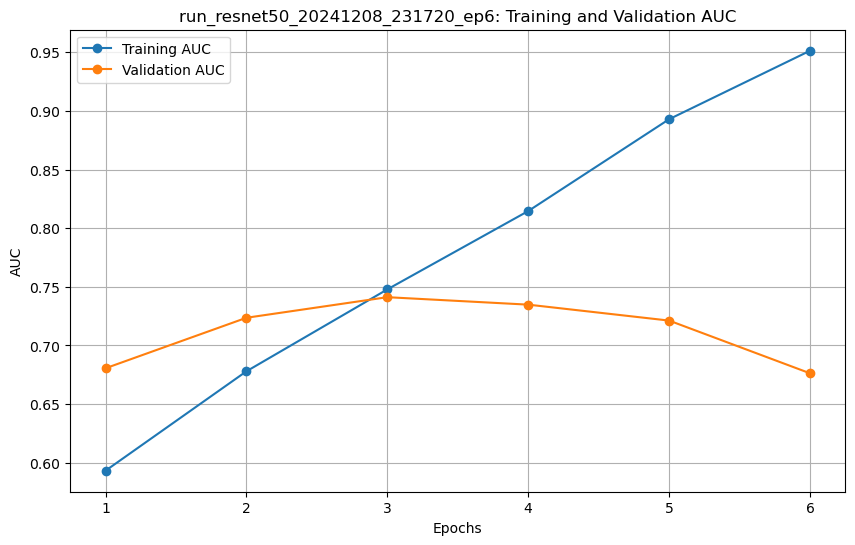

--------------------------------------------------
Model: run_resnet101_20241204_201138_ep14
    epoch      loss  accuracy       auc  val_loss  val_accuracy   val_auc
13     14  1.390531  0.926538  0.556986  1.547141      0.978797  0.535491


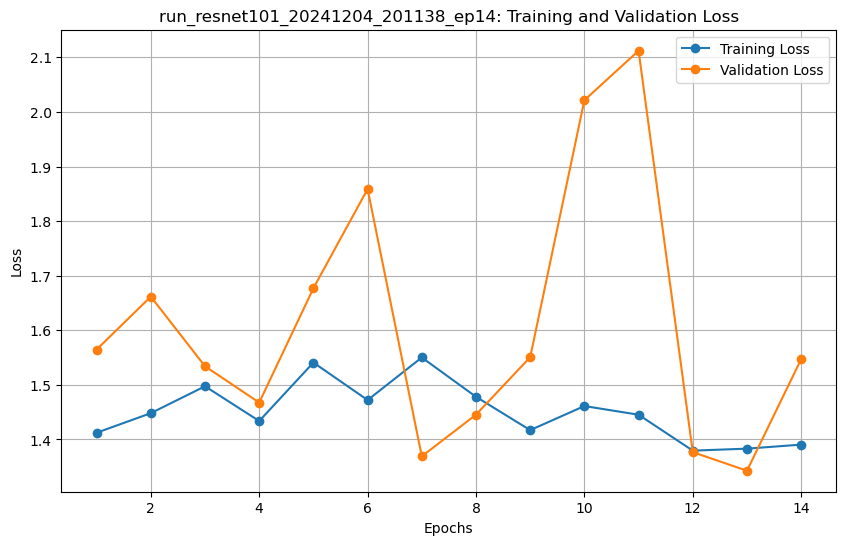

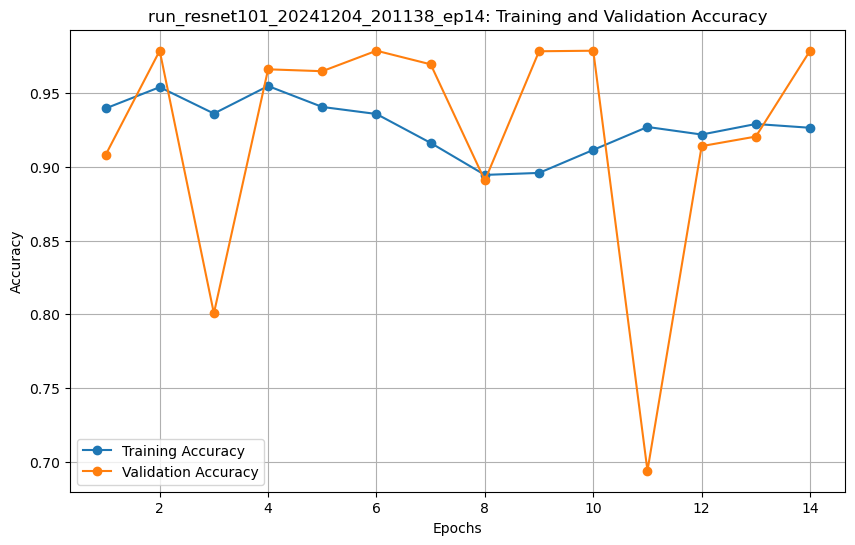

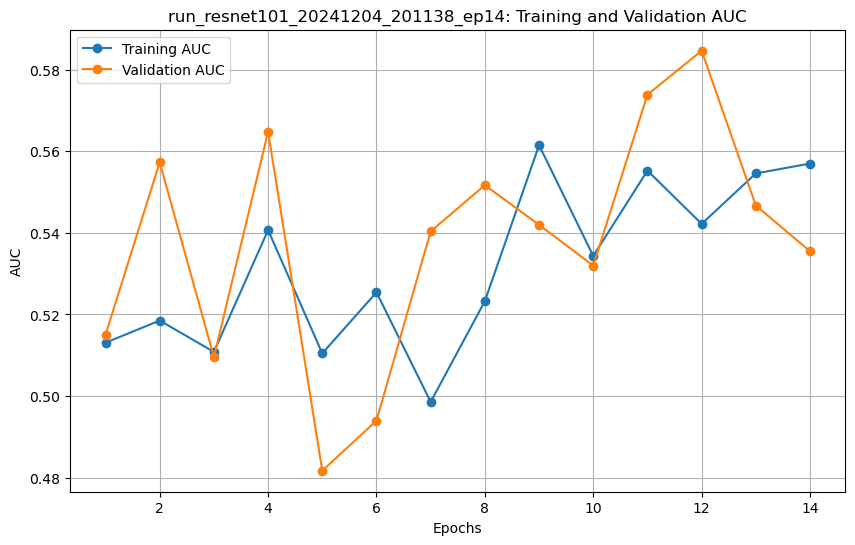

--------------------------------------------------
Model: run_vit_mediumd_20241209_002034_ep26
    epoch      loss  accuracy       auc  val_loss  val_accuracy  val_auc  \
24     25  1.358367  0.978841  0.475069  1.358214      0.978797   0.5246   

    auc_diff  
24 -0.049531  


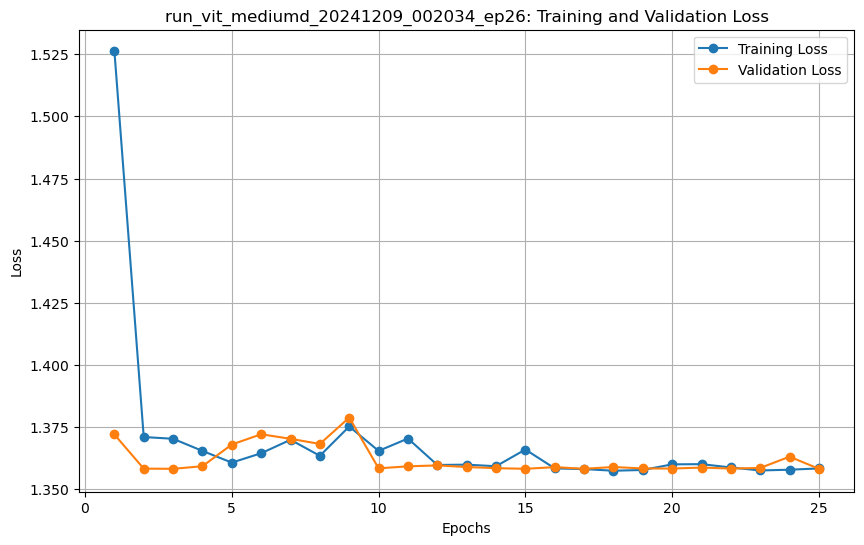

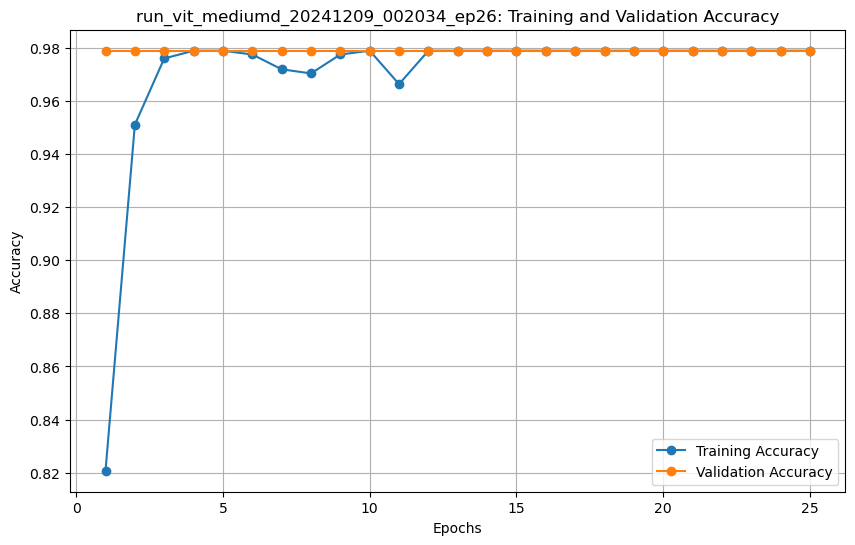

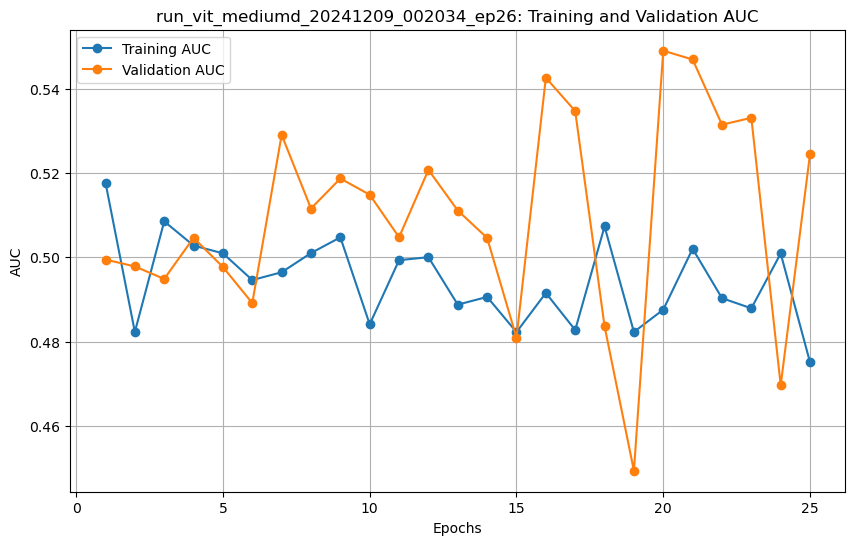

In [15]:
paths = [
    'history/runs/run_vit_base_20241207_113554_ep28/',
    'history/runs/run_efficientnet_20241205_114438_ep7/',
    'history/runs/run_resnet50_20241208_231720_ep6/',
    'history/runs/run_resnet101_20241204_201138_ep14/',
    'history/runs/run_vit_mediumd_20241209_002034_ep26/',
]
from history_visualizer import plot_metrics
for path in paths:
    metrics_path = os.path.join(path, 'metrics.csv')
    metrics_data = pd.read_csv(metrics_path)
    # print a seperator
    print(f"{'-'*50}")
    print(f"Model: {path.split('/')[-2]}")
    print(metrics_data.tail(1))
    plot_metrics(metrics_data, model_name=path.split('/')[-2])
